In [1]:
import json

path = "/Users/pkardas/Downloads/gupb__2020_10_13_00_20_45.json"

with open(path, 'r') as file:
    data = [
        json.loads(line)
        for line in file.readlines()
    ]

print(len(data))

2079080


In [4]:
controller_actions = [
    log
    for log in data
    if log.get("value") and log.get("value").get("controller_name") and log.get("value").get("action_name")
]

In [5]:
len(controller_actions)

921163

In [7]:
controller_names = {action.get("value").get("controller_name") for action in controller_actions}

In [8]:
controller_names

{'BBBotControllerBartek',
 'BotElkaZ nami na pewno zdasz',
 'ClaretWolfController',
 'IHaveNoIdeaWhatImDoingController',
 'Krowa1233ControllerKrowka',
 'TupTupBot'}

In [9]:
action_names = {action.get("value").get("action_name") for action in controller_actions}

In [10]:
action_names

{'ATTACK', 'DO_NOTHING', 'STEP_FORWARD', 'TURN_LEFT', 'TURN_RIGHT'}

In [11]:
controllers_summary = {
    controller_name: {
        action_name: len(
            [
                action 
                for action in controller_actions
                if action.get("value").get("controller_name") == controller_name and action.get("value").get("action_name") == action_name
            ]
        )
        for action_name in action_names
    } for controller_name in controller_names
}

In [12]:
controllers_summary

{'BBBotControllerBartek': {'TURN_LEFT': 0,
  'STEP_FORWARD': 97888,
  'DO_NOTHING': 6,
  'ATTACK': 227,
  'TURN_RIGHT': 51699},
 'TupTupBot': {'TURN_LEFT': 34,
  'STEP_FORWARD': 86,
  'DO_NOTHING': 11,
  'ATTACK': 0,
  'TURN_RIGHT': 140552},
 'IHaveNoIdeaWhatImDoingController': {'TURN_LEFT': 1354,
  'STEP_FORWARD': 14313,
  'DO_NOTHING': 0,
  'ATTACK': 58825,
  'TURN_RIGHT': 118077},
 'Krowa1233ControllerKrowka': {'TURN_LEFT': 20544,
  'STEP_FORWARD': 72312,
  'DO_NOTHING': 0,
  'ATTACK': 0,
  'TURN_RIGHT': 20569},
 'BotElkaZ nami na pewno zdasz': {'TURN_LEFT': 0,
  'STEP_FORWARD': 32655,
  'DO_NOTHING': 44,
  'ATTACK': 859,
  'TURN_RIGHT': 152499},
 'ClaretWolfController': {'TURN_LEFT': 107171,
  'STEP_FORWARD': 10512,
  'DO_NOTHING': 0,
  'ATTACK': 10448,
  'TURN_RIGHT': 10478}}

In [14]:
import pandas as pd

table = pd.DataFrame(controllers_summary)

table

,BBBotControllerBartek,TupTupBot,IHaveNoIdeaWhatImDoingController,Krowa1233ControllerKrowka,BotElkaZ nami na pewno zdasz,ClaretWolfController
TURN_LEFT,0,34,1354,20544,0,107171
STEP_FORWARD,97888,86,14313,72312,32655,10512
DO_NOTHING,6,11,0,0,44,0
ATTACK,227,0,58825,0,859,10448
TURN_RIGHT,51699,140552,118077,20569,152499,10478


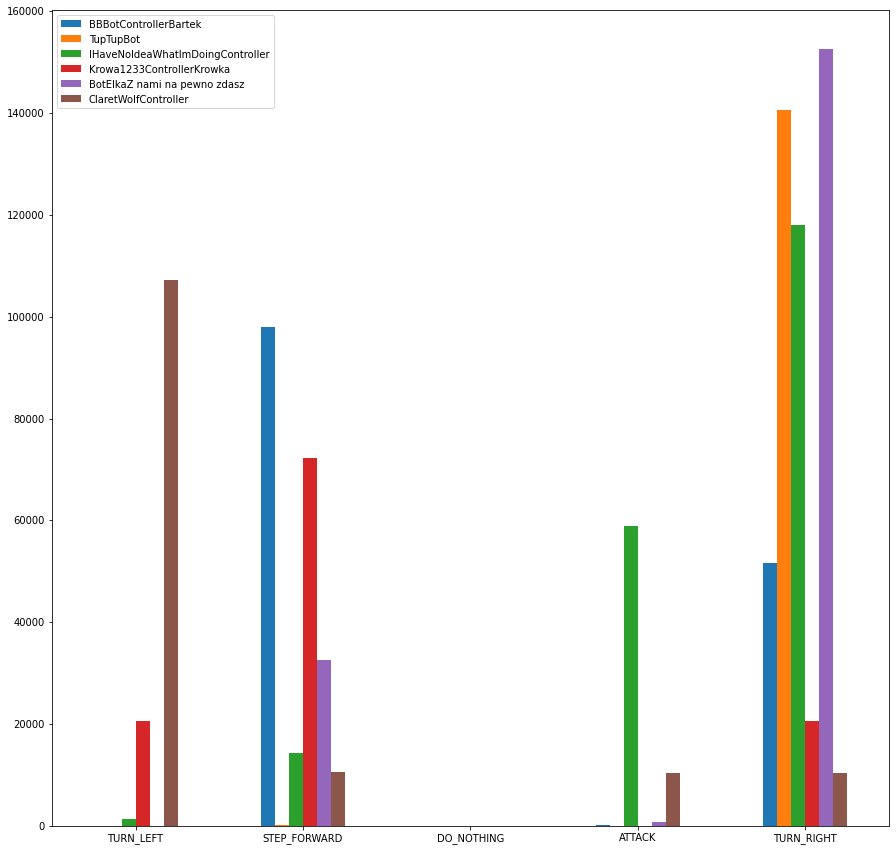

In [18]:
table.plot.bar(rot=0, figsize=(15, 15))